In [16]:
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

##df=df.drop(columns=['Fwd URG Flags','Bwd URG Flags','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg'])
#these colummns were dropped from the original dataset since they only had 0s for all of their values.
##
# Code to convert Timestamp attribute to numerical data.
# import datetime
# df['Hours From Time']=(df['Timestamp']-datetime.datetime(1970,1,1)).dt.total_seconds()/600
# df['Hours From Time']=df['Hours From Time'].astype('int64')
# df.drop(columns=['Timestamp'],inplace=True)

#myddos is sample of the original dataset (20%)
df=pd.read_csv('./myddos')


In [17]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
df.corr().style.background_gradient(cmap='magma')



C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [18]:
# forwardFeatures=[x for x in df.columns if "Fwd" in x]
# backwardFeatures=[x for x in df.columns if "Bwd" in x]
forwarddf=df.filter(regex='Fwd')
forwarddf['Label']=df['Label']
backwarddf=df.filter(regex='Bwd')
backwarddf['Label']=df['Label']
importantdf=df[['Flow ID','minutes_from_time','Fwd Seg Size Min','Src IP','Dst IP','Flow IAT Min','Src Port','Tot Fwd Pkts','Init Bwd Win Byts','Label']]
ourdf=df[['Fwd Seg Size Min', 'Flow IAT Min', 'Src Port', 'Tot Bwd Pkts', 'Init Bwd Win Byts', 'Label']]

df.columns

C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/1764824438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forwarddf['Label']=df['Label']
C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/1764824438.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backwarddf['Label']=df['Label']


Index(['Unnamed: 0', 'index', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Flow ID', 'Src IP',
       'Src Port', 'Dst IP', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt

### Original

C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.9001383964465065

              precision    recall  f1-score   support

           0       0.98      0.90      0.94    314758
           1       0.65      0.89      0.75     64587

    accuracy                           0.90    379345
   macro avg       0.81      0.90      0.84    379345
weighted avg       0.92      0.90      0.91    379345



<AxesSubplot:>

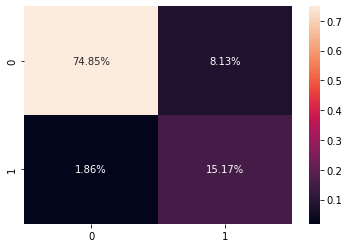

In [19]:
enc=preprocessing.LabelEncoder()
#Encoding the ip addresses to integers
df['Src IP']=enc.fit_transform(df['Src IP'])
df['Dst IP']=enc.fit_transform(df['Dst IP'])

X=df.drop(columns=['Label'])
y=df['Label'].values
X=np.nan_to_num(X)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=123)
NaiveModel= BernoulliNB()
NaiveModel.fit(xtrain,ytrain)
ypred=NaiveModel.predict(xtest)

display(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
display(sns.heatmap(confusion_matrix(ytest,ypred)/np.sum(confusion_matrix(ytest,ypred)),annot=True,fmt='.02%'))


### Forward DF


C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/3966750751.py:5: RuntimeWarning: divide by zero encountered in log
  X=np.log(X)
C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/3966750751.py:5: RuntimeWarning: invalid value encountered in log
  X=np.log(X)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: ove

0.9075406292425101

              precision    recall  f1-score   support

           0       0.94      0.95      0.94    314758
           1       0.73      0.72      0.72     64587

    accuracy                           0.91    379345
   macro avg       0.84      0.83      0.83    379345
weighted avg       0.91      0.91      0.91    379345



<AxesSubplot:>

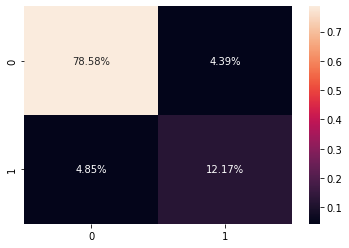

In [20]:
##Foward Df
X=forwarddf.drop(columns=['Label'])
y=forwarddf['Label'].values
X=np.nan_to_num(X)
X=np.log(X)

X=np.nan_to_num(X)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=123)

NaiveModel= BernoulliNB()
NaiveModel.fit(xtrain,ytrain)
ypred=NaiveModel.predict(xtest)

display(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
display(sns.heatmap(confusion_matrix(ytest,ypred)/np.sum(confusion_matrix(ytest,ypred)),annot=True,fmt='.02%'))


### Backward


C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Omar\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0.8309138119653613

              precision    recall  f1-score   support

           0       0.89      0.91      0.90    314758
           1       0.50      0.45      0.48     64587

    accuracy                           0.83    379345
   macro avg       0.70      0.68      0.69    379345
weighted avg       0.82      0.83      0.83    379345



<AxesSubplot:>

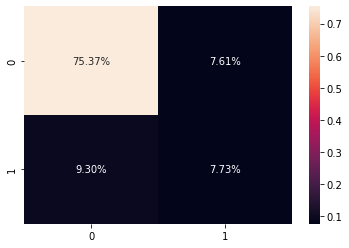

In [21]:
##Backward Df
X=backwarddf.drop(columns=['Label'])
y=backwarddf['Label'].values

X=np.log(X)

X=np.nan_to_num(X)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=123)

NaiveModel= BernoulliNB()
NaiveModel.fit(xtrain,ytrain)
ypred=NaiveModel.predict(xtest)

display(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
display(sns.heatmap(confusion_matrix(ytest,ypred)/np.sum(confusion_matrix(ytest,ypred)),annot=True,fmt='.02%'))


### Suggested Features

C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/463127559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importantdf['Src IP']=enc.fit_transform(importantdf['Src IP'])
C:\Users\Omar\AppData\Local\Temp/ipykernel_19368/463127559.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importantdf['Dst IP']=enc.fit_transform(importantdf['Dst IP'])


0.9526025122250195

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    314758
           1       0.84      0.89      0.87     64587

    accuracy                           0.95    379345
   macro avg       0.91      0.93      0.92    379345
weighted avg       0.95      0.95      0.95    379345



<AxesSubplot:>

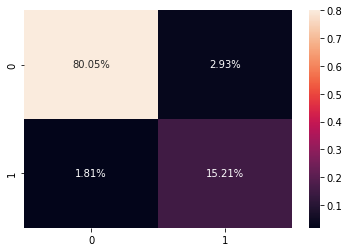

In [22]:

#Encoding the ip addresses to integers

importantdf['Src IP']=enc.fit_transform(importantdf['Src IP'])
importantdf['Dst IP']=enc.fit_transform(importantdf['Dst IP'])
X=importantdf.drop(columns=['Label'])
y=importantdf['Label'].values


X=np.nan_to_num(X)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=123)

NaiveModel= BernoulliNB()
NaiveModel.fit(xtrain,ytrain)
ypred=NaiveModel.predict(xtest)

display(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
display(sns.heatmap(confusion_matrix(ytest,ypred)/np.sum(confusion_matrix(ytest,ypred)),annot=True,fmt='.02%'))


0.9526025122250195

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    314758
           1       0.84      0.89      0.87     64587

    accuracy                           0.95    379345
   macro avg       0.91      0.93      0.92    379345
weighted avg       0.95      0.95      0.95    379345



<AxesSubplot:>

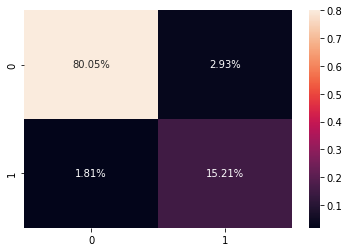

In [23]:
##Foward Df'Fwd Seg Size Min', 'Flow IAT Min', 'Src Port', 'Tot Bwd Pkts', 'Init Bwd Win Byts', 'Label']
X=ourdf.drop(columns=['Label'])
y=ourdf['Label'].values
X=np.nan_to_num(X)
##

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=123)

NaiveModel= BernoulliNB()
NaiveModel.fit(xtrain,ytrain)
ypred=NaiveModel.predict(xtest)

display(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
display(sns.heatmap(confusion_matrix(ytest,ypred)/np.sum(confusion_matrix(ytest,ypred)),annot=True,fmt='.02%'))
